# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Patuh Rujhan Al Istizhar
- **Email:** patuh41@gmail.com
- **ID Dicoding:** patuh_istizhar

## Menentukan Pertanyaan Bisnis
1. Bagaimana distribusi pelanggan berdasarkan kota dan negara bagian (state) dalam periode September 2016 hingga September 2018?
2. Kategori produk apa yang memiliki volume penjualan dan pendapatan tertinggi dalam periode September 2016 hingga September 2018?
3. Metode pembayaran apa yang paling sering digunakan dan menghasilkan total transaksi terbesar dalam periode September 2016 hingga September 2018?

## Import Semua Packages/Library yang Digunakan

In [178]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data_folder = Path("data")

## Data Wrangling

### Gathering Data

In [179]:
customers_df = pd.read_csv(data_folder / "customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [180]:
geolocation_df = pd.read_csv(data_folder / "geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [181]:
order_items_df = pd.read_csv(data_folder / "order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [182]:
order_payments_df = pd.read_csv(data_folder / "order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [183]:
order_reviews_df = pd.read_csv(data_folder / "order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [184]:
orders_df = pd.read_csv(data_folder / "orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [185]:
product_category_name_translation_df = pd.read_csv(
    data_folder / "product_category_name_translation.csv"
)
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [186]:
products_df = pd.read_csv(data_folder / "products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [187]:
sellers_df = pd.read_csv(data_folder / "sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset terdiri dari 9 tabel:
  - **customers_dataset**: berisi informasi pelanggan.
  - **geolocation_dataset**: berisi koordinat lokasi pengiriman.
  - **order_items_dataset**: berisi detail produk yang dibeli dalam setiap order.
  - **order_payments_dataset**: berisi metode dan jumlah pembayaran.
  - **order_reviews_dataset**: berisi ulasan dan rating dari pelanggan.
  - **orders_dataset**: berisi informasi utama tentang setiap order.
  - **products_dataset**: berisi detail produk yang dijual.
  - **sellers_dataset**: berisi informasi penjual.
  - **product_category_name_translation**: berisi terjemahan kategori produk.

### Assessing Data

Menilai tabel `customers_df`

In [188]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [189]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [190]:
print(f"Jumlah data duplikat: {customers_df.duplicated().sum()}")

Jumlah data duplikat: 0


In [191]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Menilai tabel `geolocation_df`

In [192]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [193]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [194]:
print(f"Jumlah data duplikat: {geolocation_df.duplicated().sum()}")

Jumlah data duplikat: 261831


In [195]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Menilai tabel `order_items_df`

In [196]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [197]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [198]:
print(f"Jumlah data duplikat: {order_items_df.duplicated().sum()}")

Jumlah data duplikat: 0


In [199]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Menilai tabel `order_payments_df`

In [200]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [201]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [202]:
print(f"Jumlah data duplikat: {order_payments_df.duplicated().sum()}")

Jumlah data duplikat: 0


In [203]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Menilai tabel `order_reviews_df`

In [204]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [205]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [206]:
print(f"Duplicate data: {order_reviews_df.duplicated().sum()}")

Duplicate data: 0


In [207]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Menilai tabel `orders_df`

In [208]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [209]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [210]:
print(f"Duplicate data: {orders_df.duplicated().sum()}")

Duplicate data: 0


In [211]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Menilai tabel `product_category_name_translation`

In [212]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [213]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [214]:
print(f"Duplicate data: {product_category_name_translation_df.duplicated().sum()}")

Duplicate data: 0


In [215]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Menilai tabel `products_df`

In [216]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [217]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [218]:
print(f"Duplicate data: {products_df.duplicated().sum()}")

Duplicate data: 0


In [219]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Menilai tabel `sellers`

In [220]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [221]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [222]:
print(f"Duplicate data: {sellers_df.duplicated().sum()}")

Duplicate data: 0


In [223]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight**  

Berdasarkah hasil asesmen dan pertanyaan bisnis, maka penyelesaian dibutuhkan dataframe sebagai berikut. 
- `customers_df` (customer_id, customer_unique_id, customer_city, customer_state)
- `orders_df` (order_id, customer_id, order_purchase_timestamp)
- `order_items_df` (order_id, order_item_id, product_id, price)
- `products_df` (product_id, product_category_name)
- `product_category_name_translation_df` (product_category_name_english)
- `order_payments_df` (order_id, payment_type, payment_value)

Sehingga proses merge dan cleaning akan difokuskan ke dataframe di atas.

### Merge Dataset yang Relevan

In [224]:
# Merge orders_df dengan customers_df untuk distribusi pelanggan
orders_customers_df = pd.merge(
    customers_df[
        ["customer_id", "customer_unique_id", "customer_city", "customer_state"]
    ],
    orders_df[["order_id", "customer_id", "order_purchase_timestamp"]],
    on="customer_id",
    how="left",
)

orders_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
 4   order_id                  99441 non-null  object
 5   order_purchase_timestamp  99441 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [225]:
# Merge order_items_df, products_df, dan product_category_name_translation_df untuk kategori produk
items_products_df = pd.merge(
    order_items_df[["order_id", "order_item_id", "product_id", "price"]],
    products_df[["product_id", "product_category_name"]],
    on="product_id",
    how="left",
)

items_products_df = pd.merge(
    items_products_df,
    product_category_name_translation_df,
    on="product_category_name",
    how="left",
)

items_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   price                          112650 non-null  float64
 4   product_category_name          111047 non-null  object 
 5   product_category_name_english  111023 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.2+ MB


In [226]:
# Merge orders_customers_df dengan items_products_df
orders_items_df = pd.merge(
    orders_customers_df, items_products_df, on="order_id", how="left"
)

# Merge dengan order_payments_df untuk metode pembayaran dan RFM
all_data_df = pd.merge(
    orders_items_df,
    order_payments_df[["order_id", "payment_type", "payment_value"]],
    on="order_id",
    how="left",
)

all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    118434 non-null  object 
 1   customer_unique_id             118434 non-null  object 
 2   customer_city                  118434 non-null  object 
 3   customer_state                 118434 non-null  object 
 4   order_id                       118434 non-null  object 
 5   order_purchase_timestamp       118434 non-null  object 
 6   order_item_id                  117604 non-null  float64
 7   product_id                     117604 non-null  object 
 8   price                          117604 non-null  float64
 9   product_category_name          115906 non-null  object 
 10  product_category_name_english  115881 non-null  object 
 11  payment_type                   118431 non-null  object 
 12  payment_value                 

In [227]:
all_data_df.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_city                       0
customer_state                      0
order_id                            0
order_purchase_timestamp            0
order_item_id                     830
product_id                        830
price                             830
product_category_name            2528
product_category_name_english    2553
payment_type                        3
payment_value                       3
dtype: int64

In [228]:
print(f"Duplicate data: {all_data_df.duplicated().sum()}")

Duplicate data: 705


### Cleaning Data

In [229]:
# Drop kolom yang dipakai
unused_columns = ["customer_id", "product_id", "product_category_name"]
all_data_df = all_data_df.drop(columns=unused_columns)
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_unique_id             118434 non-null  object 
 1   customer_city                  118434 non-null  object 
 2   customer_state                 118434 non-null  object 
 3   order_id                       118434 non-null  object 
 4   order_purchase_timestamp       118434 non-null  object 
 5   order_item_id                  117604 non-null  float64
 6   price                          117604 non-null  float64
 7   product_category_name_english  115881 non-null  object 
 8   payment_type                   118431 non-null  object 
 9   payment_value                  118431 non-null  float64
dtypes: float64(3), object(7)
memory usage: 9.0+ MB


In [230]:
# Mengubah tipe data order_purchase_timestamp menjadi datetime
all_data_df["order_purchase_timestamp"] = pd.to_datetime(
    all_data_df["order_purchase_timestamp"]
)
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             118434 non-null  object        
 1   customer_city                  118434 non-null  object        
 2   customer_state                 118434 non-null  object        
 3   order_id                       118434 non-null  object        
 4   order_purchase_timestamp       118434 non-null  datetime64[ns]
 5   order_item_id                  117604 non-null  float64       
 6   price                          117604 non-null  float64       
 7   product_category_name_english  115881 non-null  object        
 8   payment_type                   118431 non-null  object        
 9   payment_value                  118431 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 9.0+ MB


In [231]:
# Hapus data duplikat
all_data_df = all_data_df.drop_duplicates()
print(f"Duplicate data: {all_data_df.duplicated().sum()}")

Duplicate data: 0


In [232]:
# Mengisi missing value pada kolom product_category_name_english menjadi "Unknown"
all_data_df["product_category_name_english"] = all_data_df[
    "product_category_name_english"
].fillna("Unknown")
all_data_df.isna().sum()

customer_unique_id                 0
customer_city                      0
customer_state                     0
order_id                           0
order_purchase_timestamp           0
order_item_id                    811
price                            811
product_category_name_english      0
payment_type                       3
payment_value                      3
dtype: int64

In [233]:
# Mengisi  missing value pada kolom price dengan median
all_data_df["price"] = all_data_df["price"].median()
all_data_df.isna().sum()

customer_unique_id                 0
customer_city                      0
customer_state                     0
order_id                           0
order_purchase_timestamp           0
order_item_id                    811
price                              0
product_category_name_english      0
payment_type                       3
payment_value                      3
dtype: int64

In [234]:
all_data_df = all_data_df.dropna()
all_data_df.isna().sum()

customer_unique_id               0
customer_city                    0
customer_state                   0
order_id                         0
order_purchase_timestamp         0
order_item_id                    0
price                            0
product_category_name_english    0
payment_type                     0
payment_value                    0
dtype: int64

In [235]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116915 entries, 0 to 118433
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             116915 non-null  object        
 1   customer_city                  116915 non-null  object        
 2   customer_state                 116915 non-null  object        
 3   order_id                       116915 non-null  object        
 4   order_purchase_timestamp       116915 non-null  datetime64[ns]
 5   order_item_id                  116915 non-null  float64       
 6   price                          116915 non-null  float64       
 7   product_category_name_english  116915 non-null  object        
 8   payment_type                   116915 non-null  object        
 9   payment_value                  116915 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 9.8+ MB


**Insight:**
- Setelah proses cleaning selesai, didapat data berupa 10 kolom dan 116915 baris 

## Exploratory Data Analysis (EDA)

In [236]:
all_data_df.head()

,customer_unique_id,customer_city,customer_state,order_id,order_purchase_timestamp,order_item_id,price,product_category_name_english,payment_type,payment_value
0,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,74.9,office_furniture,credit_card,146.87
1,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1.0,74.9,housewares,credit_card,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1.0,74.9,office_furniture,credit_card,157.73
3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1.0,74.9,office_furniture,credit_card,173.30
4,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1.0,74.9,home_confort,credit_card,252.25


In [237]:
# Statistik Deskriptif
all_data_df.describe(include="all")

,customer_unique_id,customer_city,customer_state,order_id,order_purchase_timestamp,order_item_id,price,product_category_name_english,payment_type,payment_value
count,116915,116915,116915,116915,116915,116915.000000,116915.0,116915,116915,116915.000000
unique,95419,4110,27,98665,NaN,NaN,NaN,72,4,NaN
top,f9ae226291893fda10af7965268fb7f6,sao paulo,SP,fedcd9f7ccdc8cba3a18defedd1a5547,NaN,NaN,NaN,bed_bath_table,credit_card,NaN
freq,35,18448,49234,34,NaN,NaN,NaN,11726,86746,NaN
mean,NaN,NaN,NaN,NaN,2017-12-30 20:16:57.180002560,1.195937,74.9,NaN,NaN,173.503818
min,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,1.000000,74.9,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,2017-09-12 11:47:07,1.000000,74.9,NaN,NaN,61.590000
50%,NaN,NaN,NaN,NaN,2018-01-18 16:37:53,1.000000,74.9,NaN,NaN,108.860000
75%,NaN,NaN,NaN,NaN,2018-05-03 23:51:46,1.000000,74.9,NaN,NaN,189.720000
max,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,21.000000,74.9,NaN,NaN,13664.080000


### Mencari Data Konsumen Terbanyak

In [238]:
# Mencari konsumen terbanyak berdasarkan customer_city dan customer_unique_id
all_data_df.groupby("customer_city")["customer_unique_id"].nunique().nlargest(5)

customer_city
sao paulo         14865
rio de janeiro     6576
belo horizonte     2654
brasilia           2056
curitiba           1455
Name: customer_unique_id, dtype: int64

In [239]:
# Mencari konsumen terbanyak berdasarkan customer_state dan customer_unique_id
all_data_df.groupby("customer_state")["customer_unique_id"].nunique().nlargest(5)

customer_state
SP    39980
RJ    12303
MG    11178
RS     5249
PR     4840
Name: customer_unique_id, dtype: int64

São Paulo (SP) mendominasi jumlah pelanggan unik dengan 39.980 transaksi, menjadikannya pasar utama yang harus difokuskan dalam strategi pemasaran dan distribusi produk. Rio de Janeiro (RJ) dan Minas Gerais (MG) menyusul sebagai target prioritas kedua, sementara Rio Grande do Sul (RS) dan Paraná (PR) memiliki potensi pertumbuhan dengan strategi promosi yang tepat.

### Akuisisi Pelanggan Baru

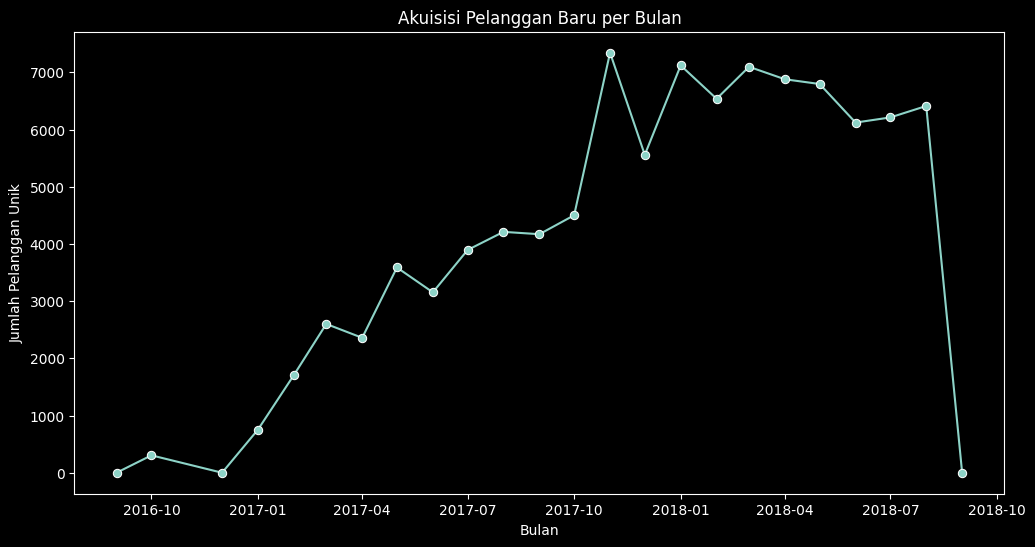

In [240]:
# Hitung jumlah pelanggan unik baru per bulan
monthly_customers = (
    all_data_df.groupby(all_data_df["order_purchase_timestamp"].dt.to_period("M"))[
        "customer_unique_id"
    ]
    .nunique()
    .reset_index()
    .assign(
        order_purchase_timestamp=lambda df: df[
            "order_purchase_timestamp"
        ].dt.to_timestamp()
    )
)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=monthly_customers,
    x="order_purchase_timestamp",
    y="customer_unique_id",
    marker="o",
)
ax.set_title("Akuisisi Pelanggan Baru per Bulan")
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Pelanggan Unik")

plt.show()

Grafik menunjukkan pertumbuhan signifikan dalam akuisisi pelanggan baru dari akhir 2016 hingga 2017, dengan lonjakan besar sekitar Oktober 2017. Setelahnya, terjadi fluktuasi sepanjang 2018, sebelum mengalami penurunan drastis di akhir tahun. Analisis lebih lanjut diperlukan untuk memahami penyebab pasti dan menentukan langkah strategis ke depan.

### Analisis Kategori Produk Terlaris dan Berpendapatan Tinggi

In [241]:
# Mencari kategori terlaris berdasarkan product_kategory_name_english dan order_id
all_data_df.groupby(by="product_category_name_english")["order_id"].count().nlargest(5)

product_category_name_english
bed_bath_table           11726
health_beauty             9917
sports_leisure            8890
furniture_decor           8702
computers_accessories     8070
Name: order_id, dtype: int64

In [242]:
# Mencari kategori berpenghasilan tertinggi berdasarkan product_kategory_name_english dan price
all_data_df.groupby(by="product_category_name_english")["price"].sum().nlargest(5)

product_category_name_english
bed_bath_table           878277.4
health_beauty            742783.3
sports_leisure           665861.0
furniture_decor          651779.8
computers_accessories    604443.0
Name: price, dtype: float64

### Volume Penjualan Bulanan bedasarkan Kategori

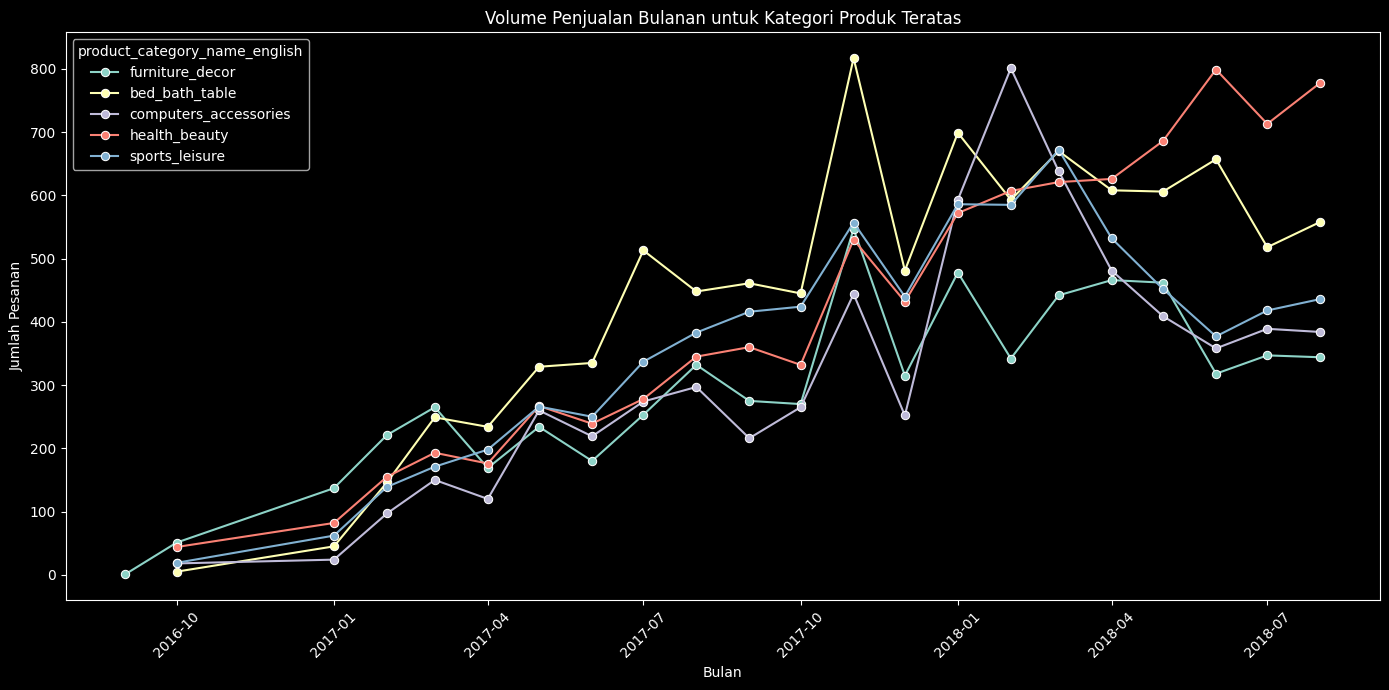

In [243]:
# Pastikan kolom timestamp dalam format datetime
all_data_df["order_purchase_timestamp"] = pd.to_datetime(
    all_data_df["order_purchase_timestamp"]
)

# 5 kategori teratas berdasarkan jumlah transaksi
top_cats = (
    all_data_df.groupby("product_category_name_english")["order_id"]
    .nunique()
    .nlargest(5)
    .index
)

# Filter data untuk kategori teratas
df_top = all_data_df[all_data_df["product_category_name_english"].isin(top_cats)].copy()

# Tambahkan kolom bulan
df_top["bulan"] = df_top["order_purchase_timestamp"].dt.to_period("M")

# Hitung jumlah pesanan bulanan berdasarkan kategori
monthly_category = (
    df_top.groupby(["bulan", "product_category_name_english"])["order_id"]
    .nunique()
    .reset_index()
)
monthly_category["bulan"] = monthly_category["bulan"].dt.to_timestamp()

# Buat plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_category,
    x="bulan",
    y="order_id",
    hue="product_category_name_english",
    marker="o",
)
plt.title("Volume Penjualan Bulanan untuk Kategori Produk Teratas")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Secara umum, jumlah pesanan meningkat dari waktu ke waktu, dengan lonjakan signifikan di beberapa bulan, terutama menjelang akhir tahun 2017 dan awal 2018. Kategori *bed_bath_table* mengalami lonjakan tertinggi pada satu periode, tetapi kemudian mengalami penurunan dan stabilisasi. Sementara itu, *health_beauty* terus mengalami pertumbuhan yang cukup konsisten hingga akhir periode. Kategori lain seperti *sports_leisure*, *furniture_decor*, dan *computers_accessories* juga menunjukkan pola peningkatan dengan beberapa fluktuasi, mencerminkan kemungkinan faktor musiman yang mempengaruhi tren penjualan.

### Analisis Metode Pembayaran yang Paling Sering Digunakan dan Berpendapatan Tertinggi

In [244]:
# Metode pembayaran paling sering digunakan
all_data_df["payment_type"].value_counts()

payment_type
credit_card    86746
boleto         22867
voucher         5611
debit_card      1691
Name: count, dtype: int64

In [245]:
# Metode pembayaran dengan pendapatan tertinggi
all_data_df.groupby("payment_type")["payment_value"].count().nlargest()

payment_type
credit_card    86746
boleto         22867
voucher         5611
debit_card      1691
Name: payment_value, dtype: int64

### Tren Preferensi Metode Pembayaran dari Waktu ke Waktu

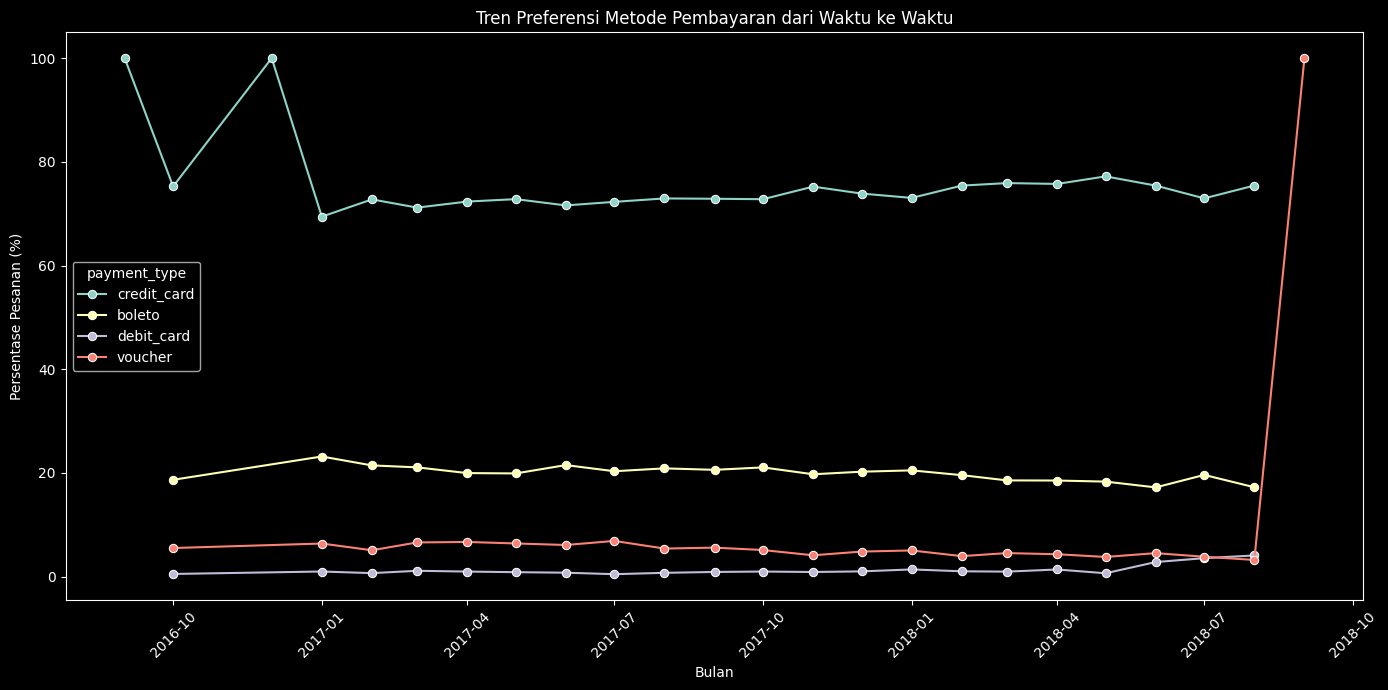

In [246]:
# Pastikan format datetime
all_data_df["order_purchase_timestamp"] = pd.to_datetime(
    all_data_df["order_purchase_timestamp"]
)

# Tambahkan kolom bulan
all_data_df["bulan"] = all_data_df["order_purchase_timestamp"].dt.to_period("M")

# Agregasi berdasarkan bulan dan metode pembayaran
monthly_payment = (
    all_data_df.groupby(["bulan", "payment_type"]).size().reset_index(name="jumlah")
)

# Hitung persentase dalam setiap bulan
total_per_bulan = monthly_payment.groupby("bulan")["jumlah"].transform("sum")
monthly_payment["persentase"] = monthly_payment["jumlah"] / total_per_bulan * 100

# Ubah periode menjadi timestamp untuk keperluan plotting
monthly_payment["bulan"] = monthly_payment["bulan"].dt.to_timestamp()

# Buat plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_payment, x="bulan", y="persentase", hue="payment_type", marker="o"
)
plt.title("Tren Preferensi Metode Pembayaran dari Waktu ke Waktu")
plt.xlabel("Bulan")
plt.ylabel("Persentase Pesanan (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Grafik menunjukkan tren preferensi metode pembayaran dari waktu ke waktu, di mana kartu kredit (*credit_card*) tetap menjadi metode pembayaran dominan dengan persentase stabil di kisaran 70-80%. Metode *boleto* berada di posisi kedua dengan persentase sekitar 15-25%, menunjukkan sedikit fluktuasi. Sementara itu, kartu debit (*debit_card*) memiliki pangsa pasar yang sangat kecil dan relatif stabil. Terjadi lonjakan drastis dalam penggunaan *voucher* di akhir periode, yang kemungkinan besar dipengaruhi oleh promosi atau kampanye tertentu yang mendorong pengguna untuk beralih ke metode ini.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

#### Bagaimana distribusi pelanggan berdasarkan kota dan negara bagian (state) dalam periode September 2016 hingga September 2018?

##### Kota

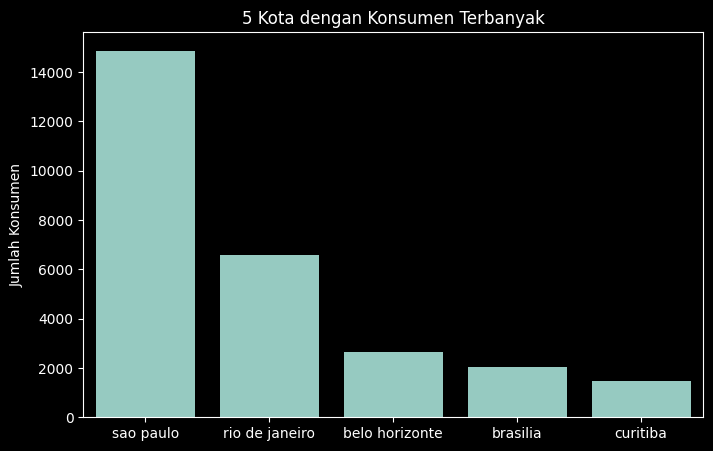

In [247]:
# Hitung jumlah pelanggan unik per kota
top_cities = (
    all_data_df.groupby("customer_city")["customer_unique_id"]
    .nunique()
    .nlargest(n=5)
    .reset_index()
)
# Plot bar chart untuk kota dengan pelanggan terbanyak
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=top_cities,
    x="customer_city",
    y="customer_unique_id",
)

# Atur label dan judul
ax.set_xlabel(None)
ax.set_ylabel("Jumlah Konsumen")
ax.set_title("5 Kota dengan Konsumen Terbanyak")

# Tampilkan plot
plt.show()

Grafik menunjukkan bahwa São Paulo memiliki jumlah konsumen tertinggi dibandingkan kota lainnya dengan selisih yang signifikan, lebih dari dua kali lipat jumlah konsumen di Rio de Janeiro yang berada di posisi kedua. Belo Horizonte, Brasília, dan Curitiba memiliki jumlah konsumen yang jauh lebih kecil dibandingkan dua kota teratas, dengan perbedaan yang tidak terlalu mencolok di antara mereka. Data ini menunjukkan bahwa São Paulo dan Rio de Janeiro merupakan pasar utama dengan basis pelanggan terbesar, sehingga strategi pemasaran dan distribusi dapat lebih difokuskan pada kota-kota tersebut untuk mencapai lebih banyak konsumen.

##### State

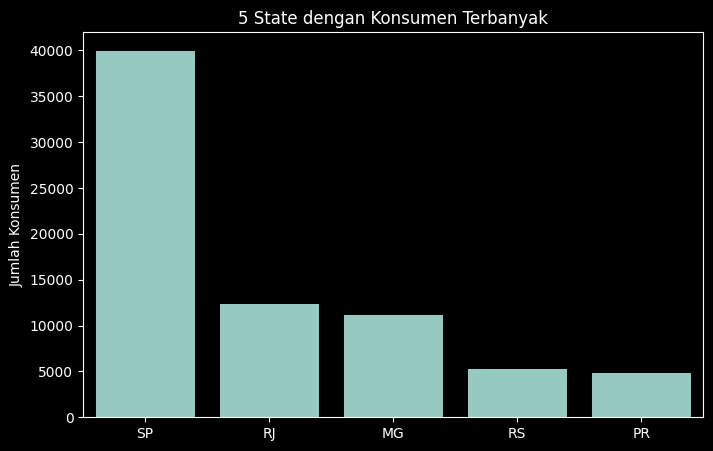

In [248]:
# Hitung jumlah pelanggan unik per state
top_states = (
    all_data_df.groupby("customer_state")["customer_unique_id"]
    .nunique()
    .nlargest(n=5)
    .reset_index()
)

# Plot bar chart untuk state dengan pelanggan terbanyak
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=top_states,
    x="customer_state",
    y="customer_unique_id",
)

# Atur label dan judul
ax.set_xlabel(None)
ax.set_ylabel("Jumlah Konsumen")
ax.set_title("5 State dengan Konsumen Terbanyak")

# Tampilkan plot
plt.show()

Grafik menunjukkan bahwa negara bagian São Paulo (SP) memiliki jumlah konsumen tertinggi, jauh melampaui negara bagian lainnya, dengan sekitar 40.000 konsumen. Rio de Janeiro (RJ) dan Minas Gerais (MG) berada di posisi kedua dan ketiga dengan jumlah konsumen yang hampir setara, tetapi masih jauh di bawah São Paulo. Sementara itu, Rio Grande do Sul (RS) dan Paraná (PR) memiliki jumlah konsumen yang lebih rendah dibandingkan tiga negara bagian teratas. Data ini mengindikasikan bahwa São Paulo adalah pasar utama dengan potensi pelanggan terbesar, sehingga dapat menjadi prioritas utama dalam strategi pemasaran dan distribusi.

### Pertanyaan 2:

#### Kategori produk apa yang memiliki volume penjualan dan pendapatan tertinggi dalam periode September 2016 hingga September 2018?

##### Kategori Produk Terlaris

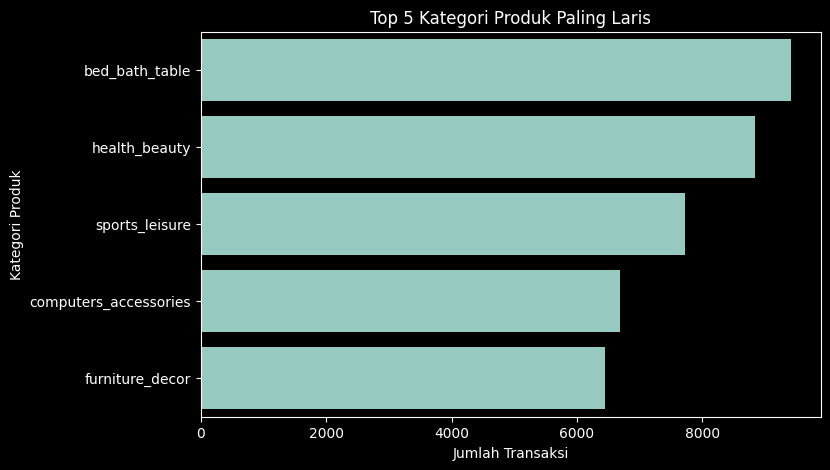

In [249]:
# Hitung jumlah transaksi per kategori produk
top_categories_by_orders = (
    all_data_df.groupby("product_category_name_english")["order_id"]
    .nunique()
    .nlargest(n=5)
    .reset_index()
)

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=top_categories_by_orders,
    x="order_id",
    y="product_category_name_english",
)

# Atur label dan judul
ax.set_xlabel("Jumlah Transaksi")
ax.set_ylabel("Kategori Produk")
ax.set_title("Top 5 Kategori Produk Paling Laris")

# Tampilkan plot
plt.show()

Grafik menunjukkan bahwa kategori produk dengan jumlah transaksi terbanyak adalah **Bed, Bath & Table**, diikuti oleh **Health & Beauty** serta **Sports & Leisure**, yang juga memiliki angka transaksi tinggi. Sementara itu, **Computers & Accessories** dan **Furniture & Decor** berada di posisi keempat dan kelima dengan jumlah transaksi yang lebih rendah dibanding tiga kategori teratas. Data ini mengindikasikan bahwa produk terkait kebutuhan rumah tangga dan perawatan diri memiliki permintaan yang tinggi, sehingga bisa menjadi fokus utama dalam strategi pemasaran dan stok produk.

##### Kategori Produk dengan Pendapatan Terbesar

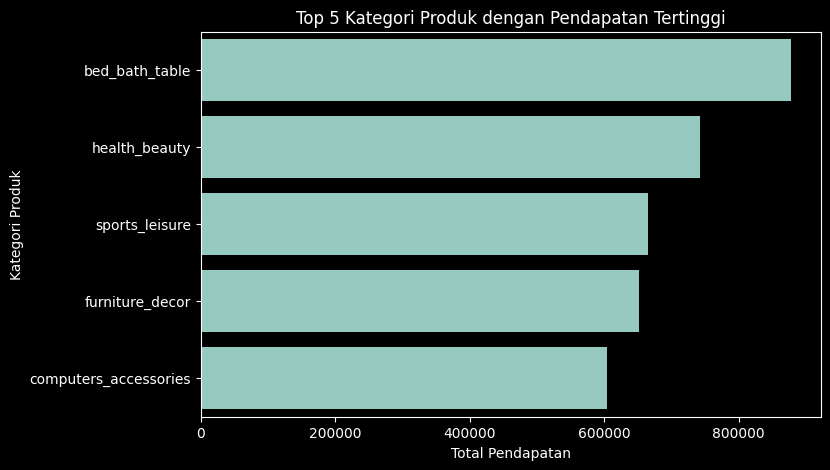

In [250]:
# Hitung total pendapatan per kategori
top_categories_by_revenue = (
    all_data_df.groupby("product_category_name_english")["price"]
    .sum()
    .nlargest(n=5)
    .reset_index()
)

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=top_categories_by_revenue,
    x="price",
    y="product_category_name_english",
)

# Atur label dan judul
ax.set_xlabel("Total Pendapatan")
ax.set_ylabel("Kategori Produk")
ax.set_title("Top 5 Kategori Produk dengan Pendapatan Tertinggi")

# Tampilkan plot
plt.show()

Grafik ini menunjukkan bahwa kategori **Bed, Bath & Table** memiliki total pendapatan tertinggi dibandingkan kategori lainnya, diikuti oleh **Health & Beauty** dan **Sports & Leisure**. Sementara itu, **Furniture & Decor** serta **Computers & Accessories** juga mencatat pendapatan yang cukup besar, meskipun lebih rendah dibanding tiga kategori teratas. Hal ini mengindikasikan bahwa selain volume transaksi yang tinggi, kategori-kategori ini juga memiliki nilai transaksi yang besar, kemungkinan karena harga produk yang relatif tinggi atau tingginya permintaan terhadap produk dalam kategori tersebut.

### Pertanyaan 3:

#### Metode pembayaran apa yang paling sering digunakan dan menghasilkan total transaksi terbesar dalam periode September 2016 hingga September 2018?

##### Metode Pembayaran Paling Sering Digunakan

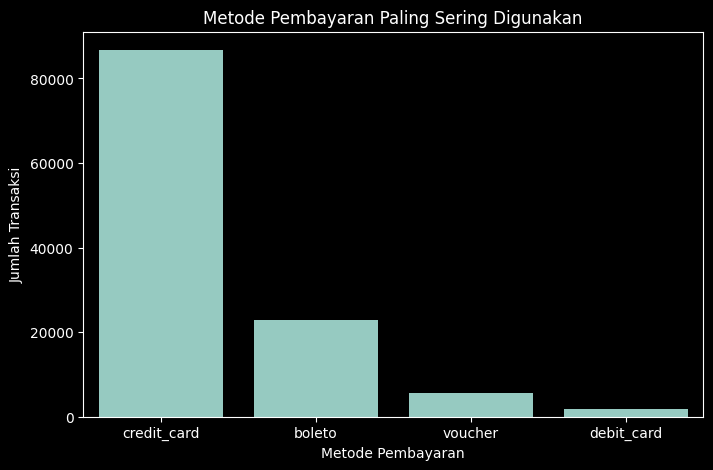

In [251]:
# Hitung jumlah transaksi berdasarkan metode pembayaran
payment_counts = all_data_df["payment_type"].value_counts().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=payment_counts,
    x="payment_type",
    y="count",
)

# Format chart
ax.set_xlabel("Metode Pembayaran")
ax.set_ylabel("Jumlah Transaksi")
ax.set_title("Metode Pembayaran Paling Sering Digunakan")

# Tampilkan plot
plt.show()

Grafik menunjukkan bahwa metode pembayaran yang paling sering digunakan adalah **kartu kredit**, dengan jumlah transaksi yang jauh lebih tinggi dibandingkan metode lainnya. **Boleto** menempati posisi kedua, meskipun jumlah transaksinya hanya sekitar seperempat dari kartu kredit. Sementara itu, penggunaan **voucher** dan **kartu debit** relatif kecil. Hal ini menunjukkan bahwa mayoritas pelanggan lebih memilih pembayaran dengan kartu kredit, kemungkinan karena kemudahannya atau adanya program cicilan.

##### Metode Pembayaran dengan Pendapatan Tertinggi

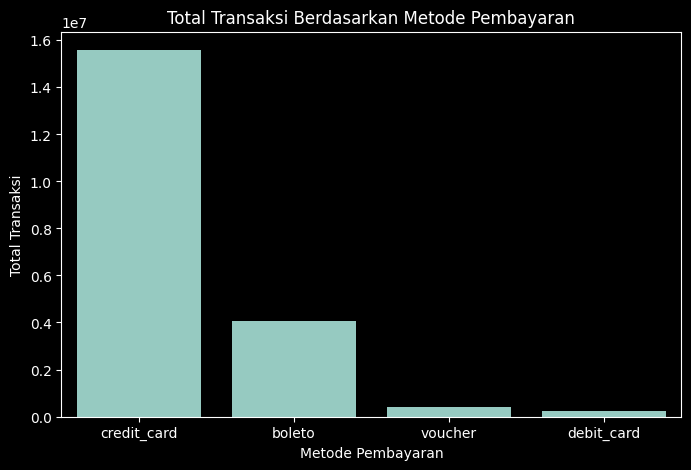

In [252]:
# Hitung total transaksi berdasarkan metode pembayaran
payment_revenue = (
    all_data_df.groupby("payment_type")["payment_value"]
    .sum()
    .nlargest(n=5)
    .reset_index()
)

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=payment_revenue,
    x="payment_type",
    y="payment_value",
)

# Format chart
ax.set_xlabel("Metode Pembayaran")
ax.set_ylabel("Total Transaksi")
ax.set_title("Total Transaksi Berdasarkan Metode Pembayaran")

# Tampilkan plot
plt.show()

**Kartu kredit** memiliki total transaksi tertinggi, mendekati **16 juta**, yang sejalan dengan tingginya jumlah penggunaannya. **Boleto** menempati posisi kedua dengan total transaksi yang cukup signifikan, meskipun masih jauh di bawah kartu kredit. Sementara itu, **voucher** dan **kartu debit** memiliki nilai transaksi yang jauh lebih kecil. Hal ini mengindikasikan bahwa kartu kredit bukan hanya metode pembayaran yang paling sering digunakan, tetapi juga memiliki nilai transaksi yang jauh lebih besar dibanding metode lainnya, kemungkinan karena digunakan untuk pembelian dengan nilai yang lebih tinggi.

## Analisis Lanjutan

### RFM (Recency, Frequency, dan Monetary)

In [253]:
# Pastikan kolom waktu transaksi berbentuk datetime
all_data_df["order_purchase_timestamp"] = pd.to_datetime(
    all_data_df["order_purchase_timestamp"]
)

# Tetapkan reference_date sebagai tanggal maksimum dalam dataset
reference_date = all_data_df["order_purchase_timestamp"].dt.date.max()

# Hitung nilai RFM
rfm = (
    all_data_df.groupby("customer_unique_id")
    .agg(
        Recency=(
            "order_purchase_timestamp",
            lambda x: (reference_date - x.max().date()).days,
        ),
        Frequency=("order_id", "nunique"),
        Monetary=("payment_value", "sum"),
    )
    .reset_index()
)

# Normalisasi nilai RFM dengan skala 1-5 (quintile ranking)
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["F_Score"] = pd.qcut(
    rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]
)
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])

# Buat segmen RFM
rfm["RFM_Segment"] = (
    rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
)
rfm["RFM_Score"] = rfm[["R_Score", "F_Score", "M_Score"]].astype(int).sum(axis=1)


# Klasifikasi pelanggan berdasarkan RFM Score
def classify_rfm(score):
    if score >= 12:
        return "Loyal Customer"
    elif score >= 9:
        return "Potential Loyalist"
    elif score >= 6:
        return "At Risk"
    else:
        return "Lost Customer"


rfm["Customer_Segment"] = rfm["RFM_Score"].apply(classify_rfm)

# Tampilkan hasil RFM Analysis
print(rfm.head())

                 customer_unique_id  Recency  Frequency  Monetary R_Score  \
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1    141.90       4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     27.19       4   
2  0000f46a3911fa3c0805444483337064      542          1     86.22       1   
3  0000f6ccb0745a6a4b88665a16c9f078      326          1     43.62       2   
4  0004aac84e0df4da2b147fca70cf8255      293          1    196.89       2   

  F_Score M_Score RFM_Segment  RFM_Score    Customer_Segment  
0       1       4         414          9  Potential Loyalist  
1       1       1         411          6             At Risk  
2       1       2         112          4       Lost Customer  
3       1       1         211          4       Lost Customer  
4       1       4         214          7             At Risk  


#### Distribusi Recency, Frequency, dan Monetary

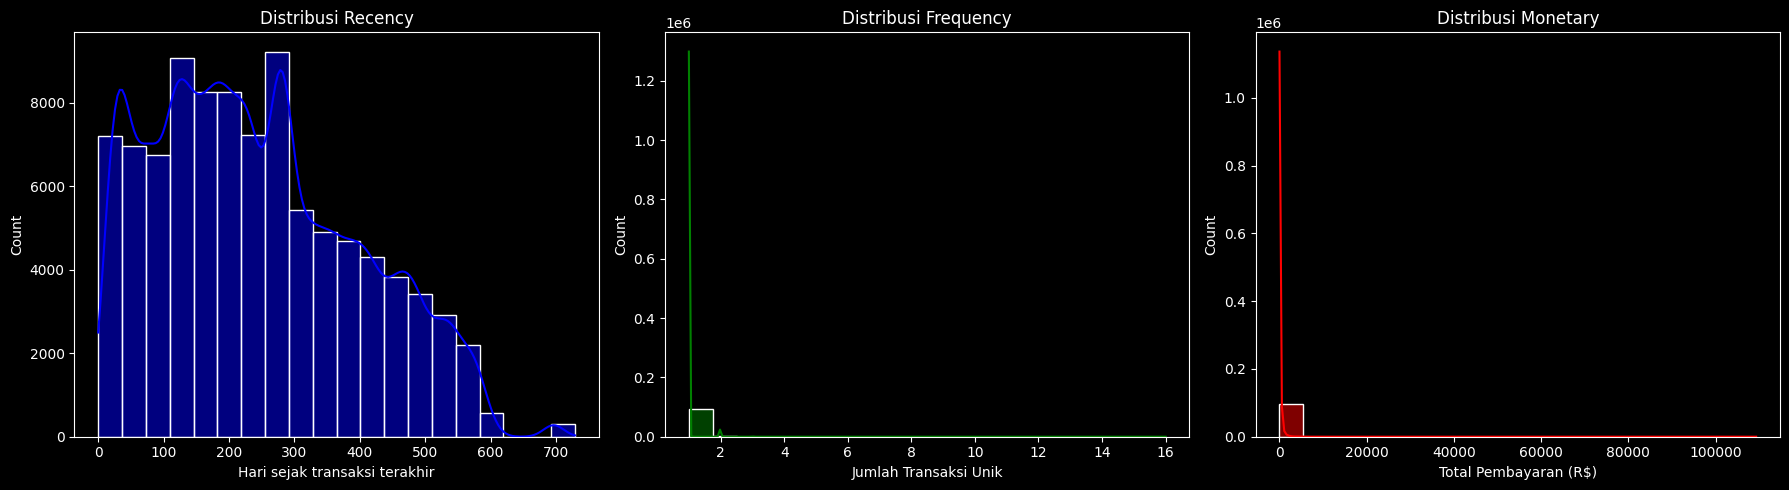

In [254]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm["Recency"], bins=20, kde=True, ax=ax[0], color="blue")
ax[0].set_title("Distribusi Recency")
ax[0].set_xlabel("Hari sejak transaksi terakhir")

sns.histplot(rfm["Frequency"], bins=20, kde=True, ax=ax[1], color="green")
ax[1].set_title("Distribusi Frequency")
ax[1].set_xlabel("Jumlah Transaksi Unik")

sns.histplot(rfm["Monetary"], bins=20, kde=True, ax=ax[2], color="red")
ax[2].set_title("Distribusi Monetary")
ax[2].set_xlabel("Total Pembayaran (R$)")

plt.tight_layout()
plt.show()

Distribusi Recency menunjukkan bahwa sebagian besar pelanggan melakukan transaksi terakhirnya dalam rentang 0-300 hari terakhir, dengan lonjakan signifikan di sekitar 100 dan 300 hari. Setelah 300 hari, jumlah pelanggan yang masih aktif semakin berkurang, mengindikasikan banyak pelanggan lama yang tidak lagi bertransaksi. Distribusi Frequency mengungkapkan bahwa mayoritas pelanggan hanya melakukan satu transaksi unik, sementara hanya sedikit yang bertransaksi lebih dari satu kali, menandakan bahwa sebagian besar pelanggan adalah pembeli satu kali. Sementara itu, distribusi Monetary menunjukkan bahwa sebagian besar pelanggan memiliki total pembelanjaan yang kecil, namun terdapat beberapa pelanggan dengan transaksi bernilai sangat besar, yang menjadi outliers. Berdasarkan temuan ini, strategi retensi pelanggan dapat ditingkatkan untuk mendorong lebih banyak transaksi berulang, sementara pelanggan dengan nilai transaksi besar dapat diberi perhatian khusus agar tetap loyal.

#### Segmentasi Pelanggan

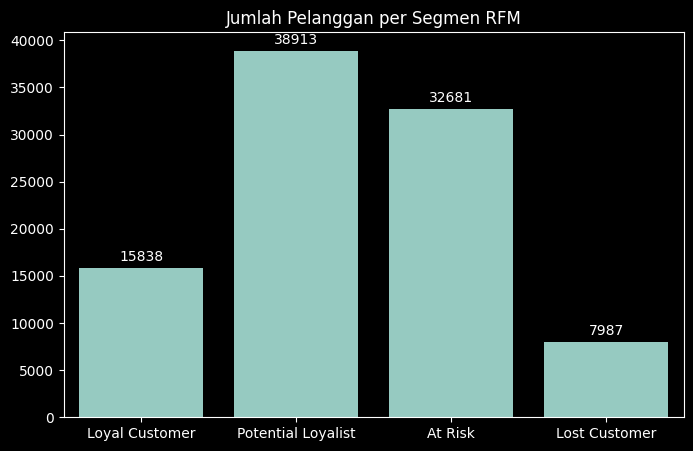

In [255]:
# Menentukan urutan kategori
order = ["Loyal Customer", "Potential Loyalist", "At Risk", "Lost Customer"]

# Konversi kolom ke kategori sesuai urutan
rfm["Customer_Segment"] = pd.Categorical(
    rfm["Customer_Segment"], categories=order, ordered=True
)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=rfm, x="Customer_Segment", order=order)

# Tambahkan label di atas bar
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="baseline",
        xytext=(0, 5),
        textcoords="offset points",
    )

ax.set_title("Jumlah Pelanggan per Segmen RFM")
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.show()

Diagram batang di atas menggambarkan jumlah pelanggan berdasarkan segmentasi RFM (Recency, Frequency, Monetary). **Potential Loyalist** merupakan segmen terbesar dengan 38.913 pelanggan, menunjukkan bahwa banyak pelanggan memiliki frekuensi transaksi yang cukup tinggi tetapi mungkin belum benar-benar loyal. **At Risk** menyusul dengan 32.681 pelanggan, yang berarti mereka pernah aktif tetapi kini menunjukkan tanda-tanda penurunan transaksi. **Loyal Customer**, yang merupakan pelanggan dengan keterlibatan tinggi dan sering bertransaksi, berjumlah 15.838 orang. Sementara itu, **Lost Customer** adalah segmen terkecil dengan 7.987 pelanggan, yang mencerminkan pelanggan yang sudah lama tidak bertransaksi dan berisiko tidak kembali. Berdasarkan data ini, strategi pemasaran dapat difokuskan untuk mempertahankan pelanggan loyal, mendorong potential loyalist menjadi pelanggan tetap, serta melakukan upaya re-engagement terhadap pelanggan at risk dan lost customer agar kembali aktif.

## Conclusion

Berdasarkan analisis data dari September 2016 hingga September 2018, berikut kesimpulannya:  

1. **Distribusi Pelanggan**  
   Sebagian besar pelanggan berasal dari **São Paulo (SP)**, diikuti oleh **Rio de Janeiro (RJ)** dan **Minas Gerais (MG)**. Wilayah ini bisa menjadi fokus utama pemasaran dan optimasi logistik.  

2. **Kategori Produk Terlaris**  
   Kategori dengan **penjualan tertinggi** adalah **Bed, Bath & Table**, diikuti oleh **Health & Beauty** serta **Sports & Leisure**. Hal ini mengindikasikan bahwa produk kebutuhan rumah tangga dan perawatan diri merupakan kategori dengan permintaan tinggi, sehingga strategi pemasaran dapat lebih difokuskan pada produk-produk ini.  

3. **Metode Pembayaran Terpopuler**  
   **Kartu kredit** adalah metode pembayaran yang paling sering digunakan dan memiliki nilai transaksi terbesar, diikuti oleh **Boleto** dan **Voucher**. Hal ini menjadikan kartu kredit sebagai infrastruktur pembayaran yang harus diutamakan, misalnya dengan menawarkan opsi cicilan atau program loyalitas untuk meningkatkan retensi pelanggan.

In [256]:
# Eksport data ke dalam file CSV
all_data_df.to_csv("./dashboard/main_data.csv", index=False, encoding="utf-8")